In [75]:
#task1

import os
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import cv2
from PIL import Image 

In [65]:
def load_img(directory, limit=None):
    images = []
    labels = []
    count = 0
    
    for filename in os.listdir(directory):
        if count == limit:
            break
            
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            labels.append(1 if "female" in filename.lower() else 0)
            count += 1
            
    return np.array(images), np.array(labels)

In [66]:
X_train_male, Y_train_male = load_img(r'F:\Uni Work\CV Lab\Lab 9\Dataset1\Train\Male', limit=1000)
X_train_female, Y_train_female = load_img(r'F:\Uni Work\CV Lab\Lab 9\Dataset1\Train\Female', limit=1000)

X_train = np.concatenate((X_train_male, X_train_female))
Y_train = np.concatenate((Y_train_male, Y_train_female))

X_test_male, Y_test_male = load_img(r'F:\Uni Work\CV Lab\Lab 9\Dataset1\Test\Male', limit=1000)
X_test_female, Y_test_female = load_img(r'F:\Uni Work\CV Lab\Lab 9\Dataset1\Test\Female', limit=1000)

X_test = np.concatenate((X_test_male, X_test_female))
Y_test = np.concatenate((Y_test_male, Y_test_female))

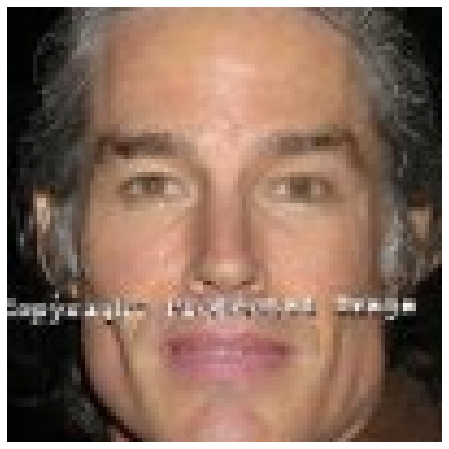

In [67]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')


def align(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    if len(faces) == 0:
        return None, None
    
    (x, y, w, h) = faces[0]
    face = image[y:y + h, x:x + w]
    aligned_face = cv2.resize(face, (100, 100))
    
    return aligned_face, (x, y, w, h)


X_train_aligned = []

for i in range(len(X_train)):
    aligned_face, _ = align(X_train[i])
    if aligned_face is not None:
        X_train_aligned.append(aligned_face)
        

X_train_aligned = np.array(X_train_aligned)
Y_train = Y_train[:len(X_train_aligned)]



X_test_aligned = []

for i in range(len(X_test)):
    aligned_face, _ = align(X_test[i])
    if aligned_face is not None:
        X_test_aligned.append(aligned_face)
        

X_test_aligned = np.array(X_test_aligned)
Y_test = Y_test[:len(X_test_aligned)]


plt.figure(figsize=(14,8))
plt.axis('off')
idx = random.randint(0, len(X_train_aligned))
plt.imshow(X_train_aligned[idx, :])
plt.show()

In [68]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model.fit(X_train_aligned, Y_train, epochs=20, batch_size=64)

Epoch 1/20
30/30 [==============================] - 6s 168ms/step - loss: 0.0948 - accuracy: 0.9826
Epoch 2/20
30/30 [==============================] - 5s 179ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/20
30/30 [==============================] - 5s 170ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/20
30/30 [==============================] - 5s 162ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/20
30/30 [==============================] - 5s 162ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
30/30 [==============================] - 5s 163ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
30/30 [==============================] - 5s 169ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
30/30 [==============================] - 5s 164ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
30/30 [==============================] - 5s 161ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
30/30 [==============================] - 5s 160ms/step -

In [70]:
model.evaluate(X_test_aligned, Y_test)

59/59 [==============================] - 1s 18ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

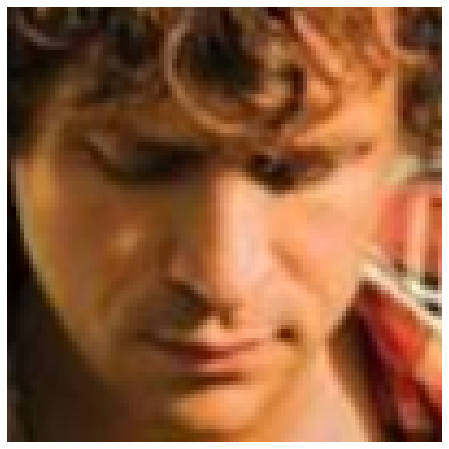

In [71]:
plt.figure(figsize=(14,8))
plt.axis('off')
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test_aligned[idx2, :])
plt.show()

In [73]:
y_pred = model.predict(X_test_aligned[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if y_pred == 1:
    pred = 'FEMALE'
else:
    pred = 'MALE'

1/1 [==============================] - 0s 45ms/step


In [74]:
print("PREDICTION:", pred)

PREDICTION: MALE


In [62]:
#task2

import glob

def load_imgs(directory, limit=None):
    images = []
    labels = []
    count = 0
    
    image_paths = glob.glob(os.path.join(directory, '*.jpg')) + glob.glob(os.path.join(directory, '*.png'))
    
    for img_path in image_paths[:limit]:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error loading image: {img_path}")
            continue
            
        img = cv2.resize(img, (100, 100))
        images.append(img)
        labels.append(os.path.basename(directory).lower())
        count += 1

#     print(len(images))
#     print(len(labels))

    return np.array(images), np.array(labels)

In [63]:
X_train_angry, Y_train_angry = load_imgs(r'F:\Uni Work\CV Lab\Lab 9\Pets_Emotions\Pets_Emotions\Angry', limit=None)
X_train_happy, Y_train_happy = load_imgs(r'F:\Uni Work\CV Lab\Lab 9\Pets_Emotions\Pets_Emotions\happy', limit=None)
X_train_other, Y_train_other = load_imgs(r'F:\Uni Work\CV Lab\Lab 9\Pets_Emotions\Pets_Emotions\Other', limit=None)
X_train_sad, Y_train_sad = load_imgs(r'F:\Uni Work\CV Lab\Lab 9\Pets_Emotions\Pets_Emotions\Sad', limit=None)
X_train = np.concatenate((X_train_angry, X_train_happy, X_train_other, X_train_sad))
Y_train = np.concatenate((Y_train_angry, Y_train_happy, Y_train_other, Y_train_sad))


X_test_angry, Y_test_angry = load_imgs(r'F:\Uni Work\CV Lab\Lab 9\Pets_Emotions\Pets_Emotions\Angry', limit=None)
X_test_happy, Y_test_happy = load_imgs(r'F:\Uni Work\CV Lab\Lab 9\Pets_Emotions\Pets_Emotions\happy', limit=None)
X_test_other, Y_test_other = load_imgs(r'F:\Uni Work\CV Lab\Lab 9\Pets_Emotions\Pets_Emotions\Other', limit=None)
X_test_sad, Y_test_sad = load_imgs(r'F:\Uni Work\CV Lab\Lab 9\Pets_Emotions\Pets_Emotions\Sad', limit=None)
X_test = np.concatenate((X_test_angry, X_test_happy, X_test_other, X_test_sad))
Y_test = np.concatenate((Y_test_angry, Y_test_happy, Y_test_other, Y_test_sad))

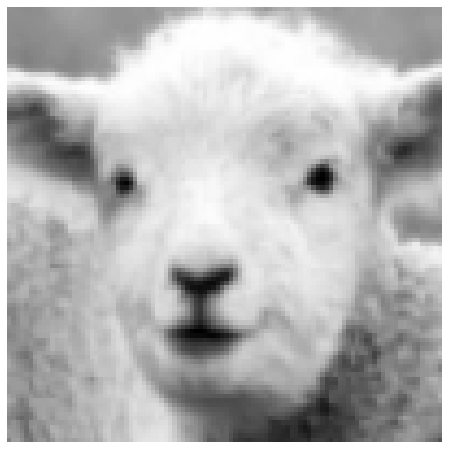

In [23]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
def align(image):
    gray = image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.001, minNeighbors=50, minSize=(70, 70))
    
    if len(faces) == 0:
        return None, None
    
    (x, y, w, h) = faces[0]
    face = image[y:y + h, x:x + w]
    aligned_face = cv2.resize(face, (100, 100))
    
    return aligned_face, (x, y, w, h)

X_train_aligned = []

for i in range(len(X_train)):
    aligned_face, _ = align(X_train[i])
    if aligned_face is not None:
        X_train_aligned.append(aligned_face)

X_train_aligned = np.array(X_train_aligned)
Y_train = Y_train[:len(X_train_aligned)]

plt.figure(figsize=(14,8))
plt.axis('off')
idx = random.randint(0, len(X_train_aligned) - 1)
plt.imshow(X_train_aligned[idx], cmap='gray')
plt.show()

In [24]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),  # Input shape adjusted for grayscale images
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 expressions (angry, happy, other, sad)
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

Y_test_filtered = [label for label in Y_test if label in label_encoder.classes_]

Y_test_encoded = label_encoder.transform(Y_test_filtered)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_aligned, Y_train_encoded, epochs=50, batch_size=64)

In [ ]:
X_test_aligned = []

for i in range(len(X_test)):
    aligned_face, _ = align(X_test[i])
    if aligned_face is not None:
        X_test_aligned.append(aligned_face)

        
X_test_aligned = np.array(X_test_aligned)
Y_test_encoded = label_encoder.transform(Y_test)
model.evaluate(X_test_aligned, Y_test_encoded)

In [ ]:
# print("Unique labels in Y_train:", np.unique(Y_train))
# print("Unique labels in Y_test:", np.unique(Y_test))


In [ ]:
# print("Number of images in X_train:", len(X_train_aligned))
# print("Number of labels in Y_train:", len(Y_train))

In [31]:
#task3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

df = pd.read_csv(r"F:\Uni Work\CV Lab\Lab 9\task3\train.csv")

In [32]:
def prepare(file_paths):
    images = []
    for file_path in file_paths:
        img = cv2.imread(r"F:\Uni Work\CV Lab\Lab 9\task3\Train\\" + file_path)
        img = cv2.resize(img, (224, 224))
        images.append(img)
    return np.array(images)

X = prepare(df['ID'].values)
y = df['Class'].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [26]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
498/498 [==============================] - 434s 869ms/step - loss: 8780.2705 - mae: 5.8090 - val_loss: 0.7562 - val_mae: 0.7040
Epoch 2/10
498/498 [==============================] - 376s 755ms/step - loss: 0.6300 - mae: 0.6639 - val_loss: 0.6843 - val_mae: 0.6998
Epoch 3/10
498/498 [==============================] - 349s 701ms/step - loss: 0.5441 - mae: 0.6044 - val_loss: 0.6801 - val_mae: 0.6822
Epoch 4/10
498/498 [==============================] - 353s 710ms/step - loss: 0.4766 - mae: 0.5595 - val_loss: 0.6688 - val_mae: 0.6711
Epoch 5/10
498/498 [==============================] - 359s 721ms/step - loss: 0.4176 - mae: 0.5193 - val_loss: 0.6834 - val_mae: 0.6594
Epoch 6/10
498/498 [==============================] - 352s 707ms/step - loss: 0.3749 - mae: 0.4865 - val_loss: 0.6940 - val_mae: 0.6713
Epoch 7/10
498/498 [==============================] - 354s 711ms/step - loss: 0.3264 - mae: 0.4522 - val_loss: 0.7037 - val_mae: 0.6729
Epoch 8/10
498/498 [=========================

In [29]:
val_loss, val_mae = model.evaluate(X_val, y_val)
print(f"Validation Mean Absolute Error: {val_mae}")

model.save("age_guess.keras")

125/125 [==============================] - 16s 129ms/step - loss: 0.7449 - mae: 0.6865
Validation Mean Absolute Error: 0.6864596605300903


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder

face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml'
face_cascade = cv2.CascadeClassifier(face_cascade_path)

def age_guess(video_path, model_path, label_encoder):
    model = load_model(model_path)

    cap = cv2.VideoCapture(video_path)

    if not hasattr(label_encoder, 'classes_') or len(label_encoder.classes_) == 0:
        raise ValueError("Label Encoder not fitted")

    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            face = frame[y:y + h, x:x + w]
            face = cv2.resize(face, (224, 224))

            face = face / 255.0
            face = np.expand_dims(face, axis=0)
            
            predicted_age = model.predict(face).squeeze()
#             print(predicted_age)
            young_threshold = 20
            old_threshold = 55
            
            numeric_age = int(predicted_age * (old_threshold - young_threshold) + young_threshold)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, f"Age: {numeric_age}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        cv2.imshow('Age Guesser', frame)

        if cv2.waitKey(1) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

age_guess(r"F:\Uni Work\CV Lab\Lab 9\task3vid.mp4", "age_guess.keras", label_encoder)

In [22]:
#task4

In [57]:
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import json


dataset_path = r'F:\Uni Work\CV Lab\Lab 9\food\raw_data'

#load annotations
annotations_file = os.path.join(dataset_path, 'public_training_set_release_2.0', 'annotations.json')
with open(annotations_file, 'r') as f:
    annotations = json.load(f)

image_paths = [item['file_name'] for item in annotations['images']]
category_ids = [item['id'] for item in annotations['images']]

category_mapping = {category['id']: category['name'] for category in annotations['categories']}

valid_category_ids = set(category_mapping.keys())
filtered_image_paths = [path for path, cat_id in zip(image_paths, category_ids) if cat_id in valid_category_ids]
filtered_category_ids = [cat_id for cat_id in category_ids if cat_id in valid_category_ids]

labels = [category_mapping[category_id] for category_id in filtered_category_ids]

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

data = list(zip(filtered_image_paths, labels))

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_dataframe(
    pd.DataFrame(data, columns=['filename', 'label']),
    directory=os.path.join(dataset_path, 'public_training_set_release_2.0', 'images'),
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'public_validation_set_2.0'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'public_test_release_2.0'),
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 2 validated image filenames belonging to 2 classes.
Found 1000 images belonging to 1 classes.
Found 3000 images belonging to 1 classes.


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))  # Adjust num_classes based on your problem

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


checkpoint = ModelCheckpoint('best_model_food.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint]
)


In [ ]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // 32)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Make predictions on the test set
predictions = model.predict(test_generator, steps=test_generator.samples // 32)

# Further analysis or output the predictions as needed

In [4]:
#task5

import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import keras
import tensorflow as tf
from random import randint
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import layers
from keras import models

In [6]:
d_count = 0 
x_data = []
y_data = []


lookup = dict()
reverselookup = dict()
count = 0

for j in os.listdir(r'F:\Uni Work\CV Lab\Lab 9\hand\leapGestRecog\00'):
    if not j.startswith('.'): 
        gesture_name = j[3:]
        lookup[gesture_name] = count
        reverselookup[count] = gesture_name
        count = count + 1
        

for i in range(0, 10): 
    for j in os.listdir(r'F:\Uni Work\CV Lab\Lab 9\hand\leapGestRecog\0' + str(i) + '/'):
        
        if not j.startswith('.'): 
            count = 0 
            for k in os.listdir(r'F:\Uni Work\CV Lab\Lab 9\hand\leapGestRecog\0' + str(i) + '/' + j + '/'):

                img = Image.open(r'F:\Uni Work\CV Lab\Lab 9\hand\leapGestRecog\0' + str(i) + '/' + j + '/' + k).convert('L')
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            gesture_name = j[3:]
            y_values = np.full((count, 1), lookup[gesture_name])
            d_count += count
            y_data.append(y_values)
            
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)

y_data = y_data.reshape(d_count, 1)

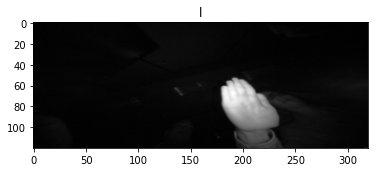

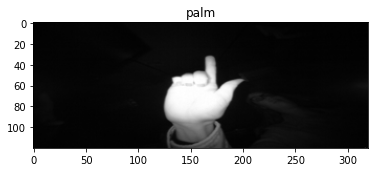

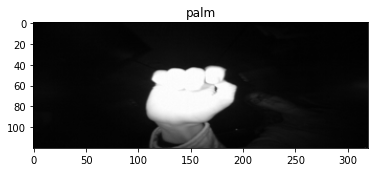

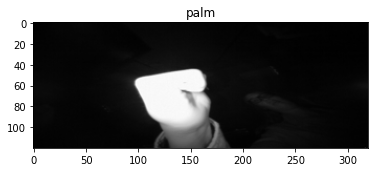

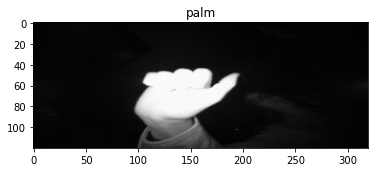

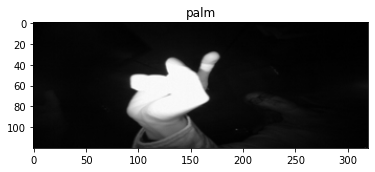

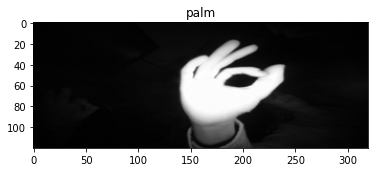

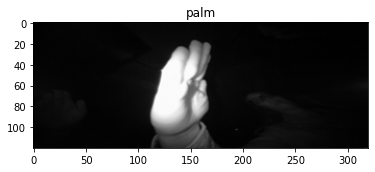

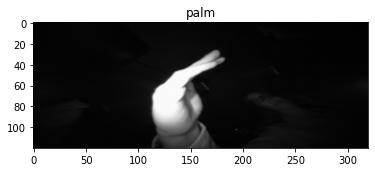

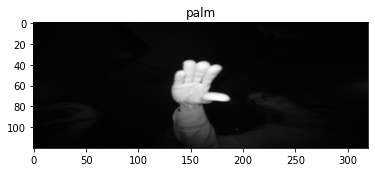

In [20]:
for i in range(0, 10):
    plt.imshow(x_data[i * 200 , :, :], cmap = 'gray')
    plt.title(reverselookup[y_data[i * 200, 0]])
    plt.show()
    
y_data = to_categorical(y_data)

x_data = x_data.reshape((d_count, 120, 320, 1))
x_data /= 255

In [8]:
x_train, x_test_val, y_train, y_test_val = train_test_split(x_data, y_data, test_size = 0.2)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_val, y_test_val, test_size = 0.5)

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides = (2, 2), activation = 'relu', input_shape = (120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
500/500 [==============================] - 63s 124ms/step - loss: 0.4229 - accuracy: 0.9454 - val_loss: 0.0092 - val_accuracy: 0.9960
Epoch 2/10
500/500 [==============================] - 60s 120ms/step - loss: 0.0202 - accuracy: 0.9957 - val_loss: 0.0021 - val_accuracy: 0.9985
Epoch 3/10
500/500 [==============================] - 63s 126ms/step - loss: 0.0236 - accuracy: 0.9975 - val_loss: 0.0026 - val_accuracy: 0.9990
Epoch 4/10
500/500 [==============================] - 59s 119ms/step - loss: 0.0130 - accuracy: 0.9981 - val_loss: 0.0040 - val_accuracy: 0.9990
Epoch 5/10
500/500 [==============================] - 59s 118ms/step - loss: 0.0127 - accuracy: 0.9981 - val_loss: 3.4076e-04 - val_accuracy: 1.0000
Epoch 6/10
500/500 [==============================] - 59s 118ms/step - loss: 0.0080 - accuracy: 0.9990 - val_loss: 1.2704e-04 - val_accuracy: 1.0000
Epoch 7/10
500/500 [==============================] - 61s 121ms/step - loss: 0.0061 - accuracy: 0.9990 - val_loss: 7.9397e

In [10]:
model.save_weights('hand_gest_w.keras')
model.save("hand_gest.keras")

Predicted Gesture: fist


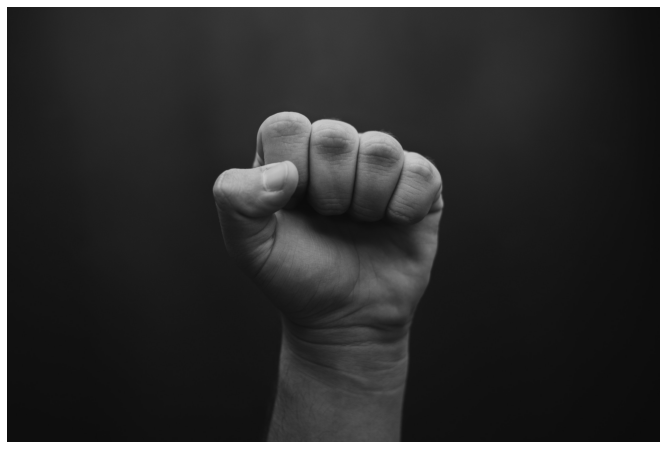

In [19]:
import mediapipe as mp
image = cv2.imread(r'F:\Uni Work\CV Lab\Lab 9\fist.jpg', cv2.IMREAD_GRAYSCALE)
height, width = image.shape

mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = hands.process(image_rgb)

if results.multi_hand_landmarks:
    for landmarks in results.multi_hand_landmarks:
        for point in landmarks.landmark:
            x, y = int(point.x * width), int(point.y * height)
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)

            
img = cv2.resize(image, (320, 120))
arr = np.array(img)
arr = tf.reshape(arr, (-1, 120, 320, 1))

# predict = model.predict(arr)

predicted_index = np.argmax(prediction)
predicted_gesture = reverselookup[predicted_index]
print("Predicted Gesture:", predicted_gesture)


plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()